Cristina Cicali, Clelia Corridori, Anna Steffinlongo

# OTOC

OTOC vs t in the semi-log scale for various values of the kicking strength

In [7]:
import libraries
from OTOCfunc import *
from LYAPfunc import *


In [3]:
N=2**14
T=2**-7
trials=1
K=[0.5,2,3,4,6,10]
Nkicks=100

mean_C=mean_otoc(N,T,K,Nkicks,True)
Kick=arange(1,Nkicks+1,1)

Trial # 0


In [48]:
# to save OTOC to file
saveF=True
if saveF==True:
    save(mean_C,'OTOC-T7-N14-1t.txt')

In [49]:
# to load data
load=False
if load==True:
    N=2**14
    T=2**-7
    K=[0.5,2,3,4,6,7,10]
    Nkicks=100
    Kick=arange(1,Nkicks+1,1)

    data = loadtxt("OTOC1-3.txt", comments="#", delimiter="\n", unpack=False)
    mean_C=reshape(data.astype(float),(Nkicks,len(K)))

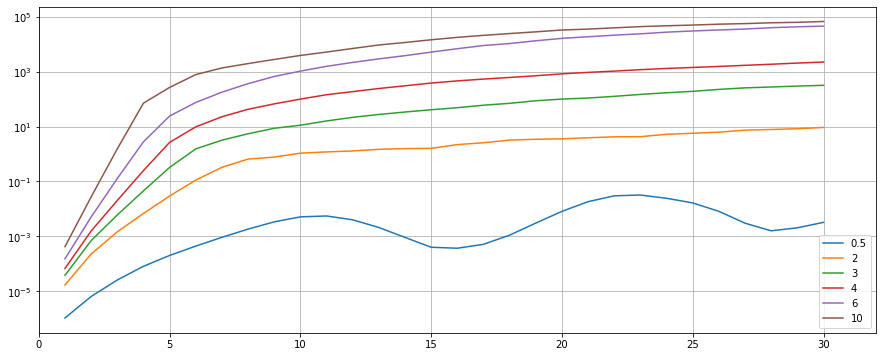

In [50]:
# OTOC plot
plt.figure(figsize=(15, 6))
plt.yscale('log')

for ii in range(len(K)):
    plt.plot(Kick[:30],mean_C[:30,ii])    
label=K

plt.legend(label, loc='lower right')
plt.xlim([0,32])
plt.grid()
plt.savefig('OTOC.png', dpi=100)

<ipython-input-57-c0946bc4f933>:6: RuntimeWarning: invalid value encountered in true_divide
  lmb[jj,:]=log(mean_C[jj,:]/mean_C[0,:])/(2*jj)
<ipython-input-57-c0946bc4f933>:22: RuntimeWarning: divide by zero encountered in true_divide
  return((1/Kick)*11)


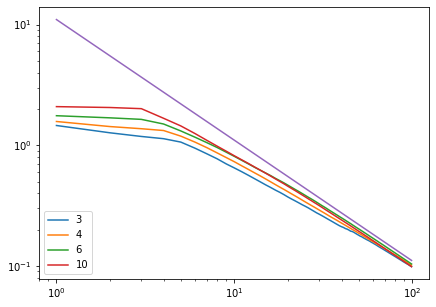

In [57]:
Kick=arange(0,Nkicks,1)
#Compute lambda from the growth of the OTOC
lmb=zeros([Nkicks,len(K)])

for jj in range(Nkicks):
    lmb[jj,:]=log(mean_C[jj,:]/mean_C[0,:])/(2*jj)

# lmb_smooth=zeros([Nkicks,len(K)])
# for kk in range(len(K)):    
#     lmb_smooth[1:,kk] = medfilt(lmb[1:,kk], 3)

#lambda vs t plot
plt.figure(figsize=(7, 5))
plt.xscale('log')
plt.yscale('log')
for kk in range(2,len(K)):
    plt.plot(arange(0,Nkicks),lmb[:,kk]) 
label=K[2:]

# asymptotic behaviour
def asymp(Kick):
    return((1/Kick)*11)

funz_t=asymp(Kick)
plt.plot(Kick,funz_t)
plt.legend(label, loc='lower left')

plt.savefig('OTOClog-log.png', dpi=100)

In [46]:
#to compute the Erenfest time faslty for k=10
abs(log(2**-8))/(log(10/2))

3.4454124645871445